# Hypothesis Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression


# These are some parameters to make figures nice (and big)

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Theory 
A null hypothesis test evaluates whether a particular observation is likely to have come about through pure chance. In Earth Science, a cut-off is generally set at 5%. If we can say that the chance of the observation having come through chance is less than 5%, we would say that we rejected the null hypothesis. This is also equivalent to saying that the observation is "statistically significant". In that case, we usually have an alternate hypothesis that we posit. 

A clasic example is climate change. We have observed a warming trend over the past century. Could such a warming trend have come about through the chance, i.e. weather? For example we could hypothesize that this trend was caused by a peculiar, but random, sequence of weather fluctuations - one that might reverse to the long-term mean. We would call this hypothesis **the null hypothesis**, and denote it by $H_0$.   We want to quantify that likelihood of that hypothesis being true. If we can quantiy that probability and say it is small - smaller than 5%, we can reject it. In turn this would give credence to the alternate hypothesis that the warming we have observed is due to human emissions. 

Hypothesis testing proceeds like this:
- **Test Statistic**: First, we need a metric for the test. This is called a test statistic, $T$. For the global warming example the metric or test statistic could be a warming trend. 
- **Formulate a null hypothesis**: Come up with hypothesis that could potentially explain your result coming about through chance. I.e. it's weather! 
- **Null Distribution**: We then compute what the probability distribution of $T$ would be **if** the null hypothesis is true. We can denote this distribution by its cdf $F_{H_0}(T)$. 
- **Evaluate Observations**: Evaluate the distribution of the null at the observed value of the test statistic: $F_{H_0}(T_{obs})$. By evaluating the CDF at $T_obs$ we can tell what is the probability that the null hypothesis woudl generate a value smaller than $T_{obs}$. 
- **p-value** Flipping that around, one minus the cdf is *the probability of the null hypothesis could generate a value as big as or larger than the observed test statistic*:
    $$p=1-F_{H_0}(T_{obs})=P(H_0\text{ generating a value of } T \geq T_{obs})$$
    if the p value is small (p<5%) we would say there is a very small probability of the null being true. 
    
Let's visualize all of this with some synthetic data meant to represent the global warming scenario.

# Null hypothesis
## Formulation 
The null hypothesis states that the observed trend $T$ is due to wheather. We assume there is no long-term trend in the weather. We can choose a very simple null-hypothesis wherein weather-related year-to-year variations in temperature are normally distributed with zero mean and some variance $\sigma^2$ of about $(0.1^\circ \text{C})^2$, a reasonable value for year-to-year fluctuations in temperature. From our discussion of sampling distributions, you should remember that even though the mean of this distribution is zero in expectation, it can differ from zero over a finite sample. The same is true for trends

Let's take a look at what spurious trends might appear from weather over a ten year interval. We'll look at four possible realizations of weather over a decade

In [8]:
sigma=0.1
Nyears=10;
t=np.arange(Nyears)
y_weather=stats.norm.rvs(0,sigma,size=Nyears)

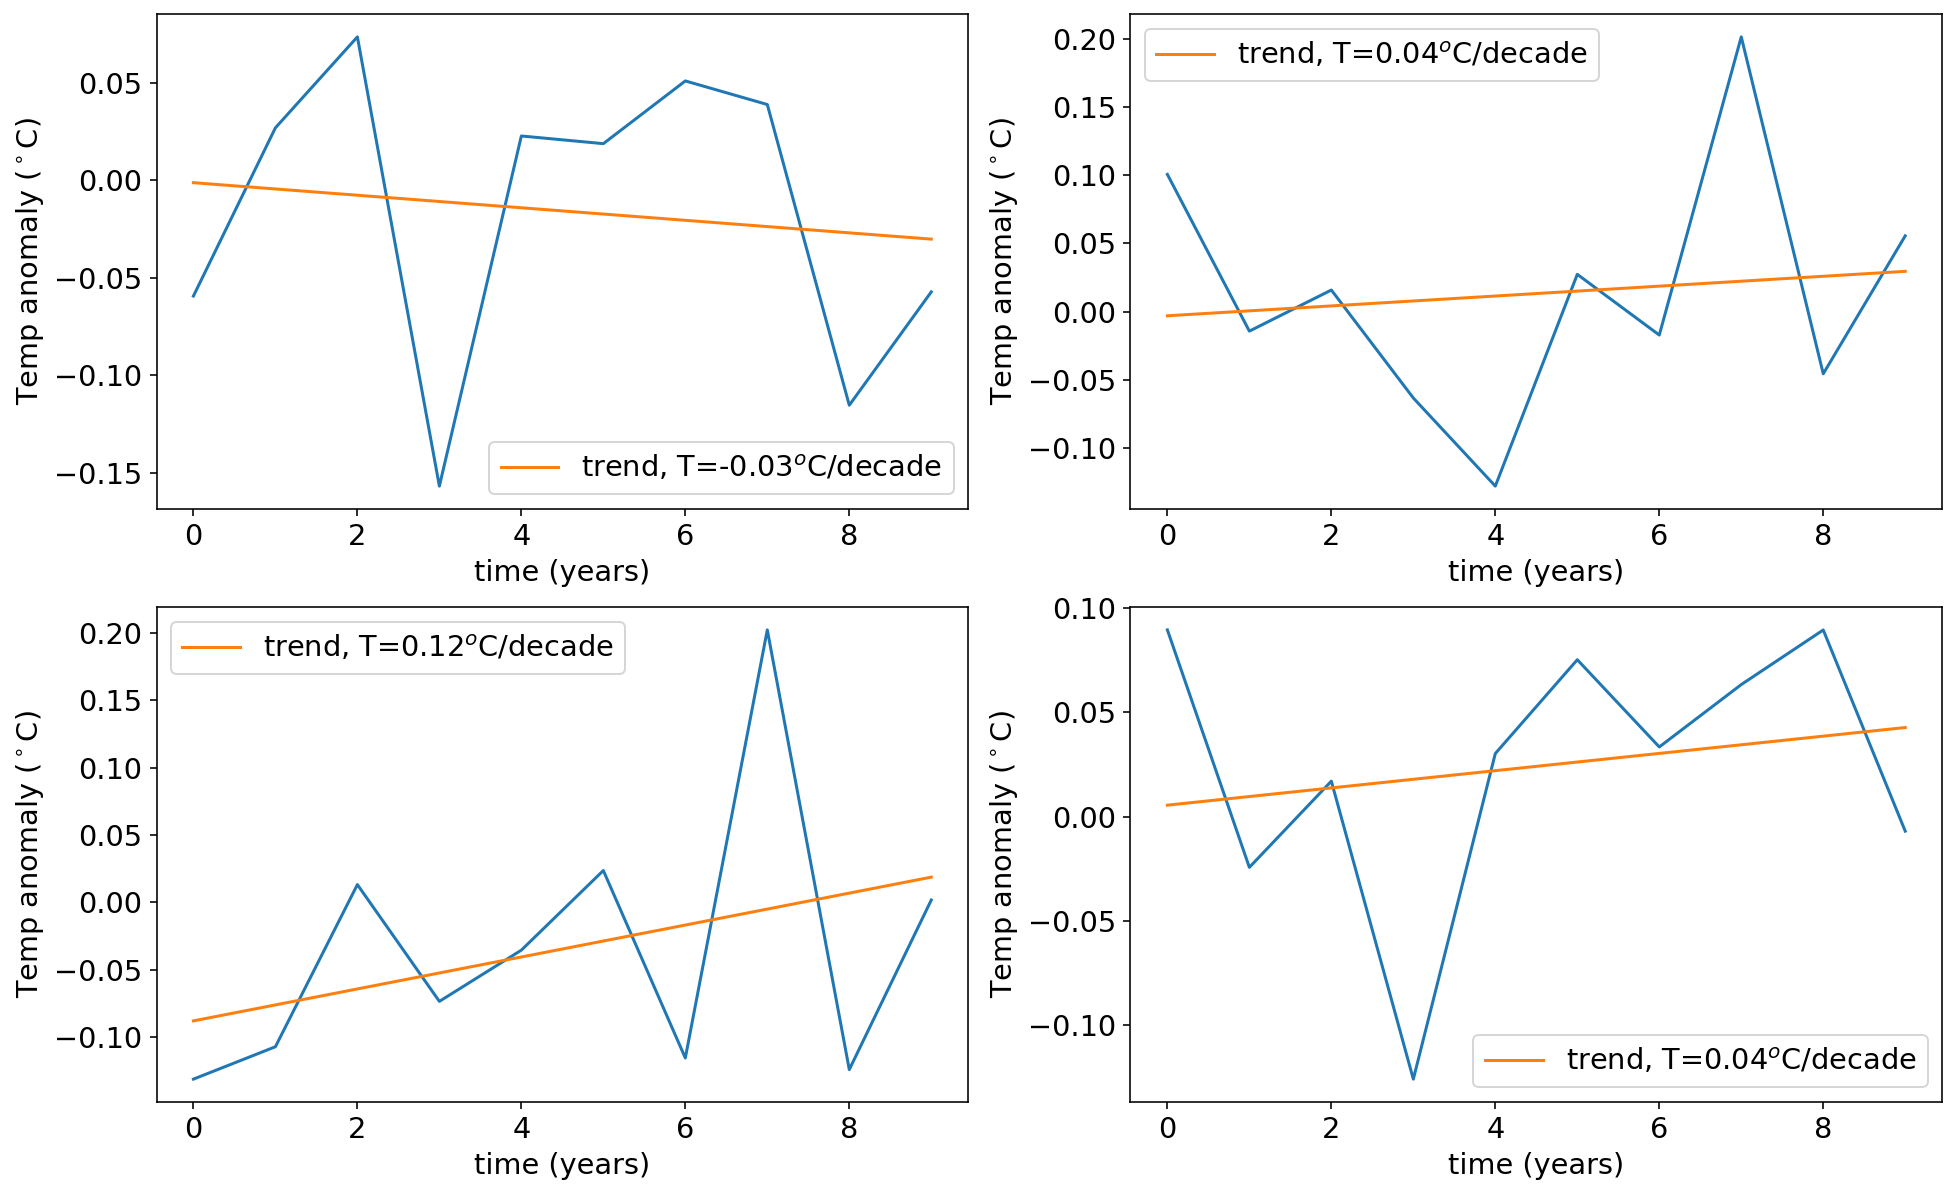

In [9]:
fig,ax=plt.subplots(2,2,figsize=[16,10])

for j in range(4):
    y_weather=stats.norm.rvs(0,sigma,size=Nyears)
    reg=LinearRegression().fit(t.reshape(-1,1),y_weather)
    yhat=reg.predict(t.reshape(-1,1));
    trend=reg.coef_[0]*10  #convert slope (deg/year) into decadal trend
   
    
    ax=plt.subplot(2,2,j+1)
    ax.plot(t,y_weather)
    ax.plot(t,yhat,label='trend, T='+np.array2string(trend,precision=2)+'$^o$C/decade')
    ax.set_xlabel('time (years)')
    ax.set_ylabel('Temp anomaly ($^\circ$C)')
    ax.legend()

## Distribution
Now let's generate a large number of samples of "weather" to understand the distribution of the test stastic T (the warming trend).


In [10]:
nsamples=10000
#preallocate 
T_H0=np.zeros(nsamples)

for j in range(nsamples):
    # generate a random sample
    y_weather=stats.norm.rvs(0,sigma,size=Nyears)
    reg=LinearRegression().fit(t.reshape(-1,1),y_weather)
    T_H0[j]=reg.coef_*10;

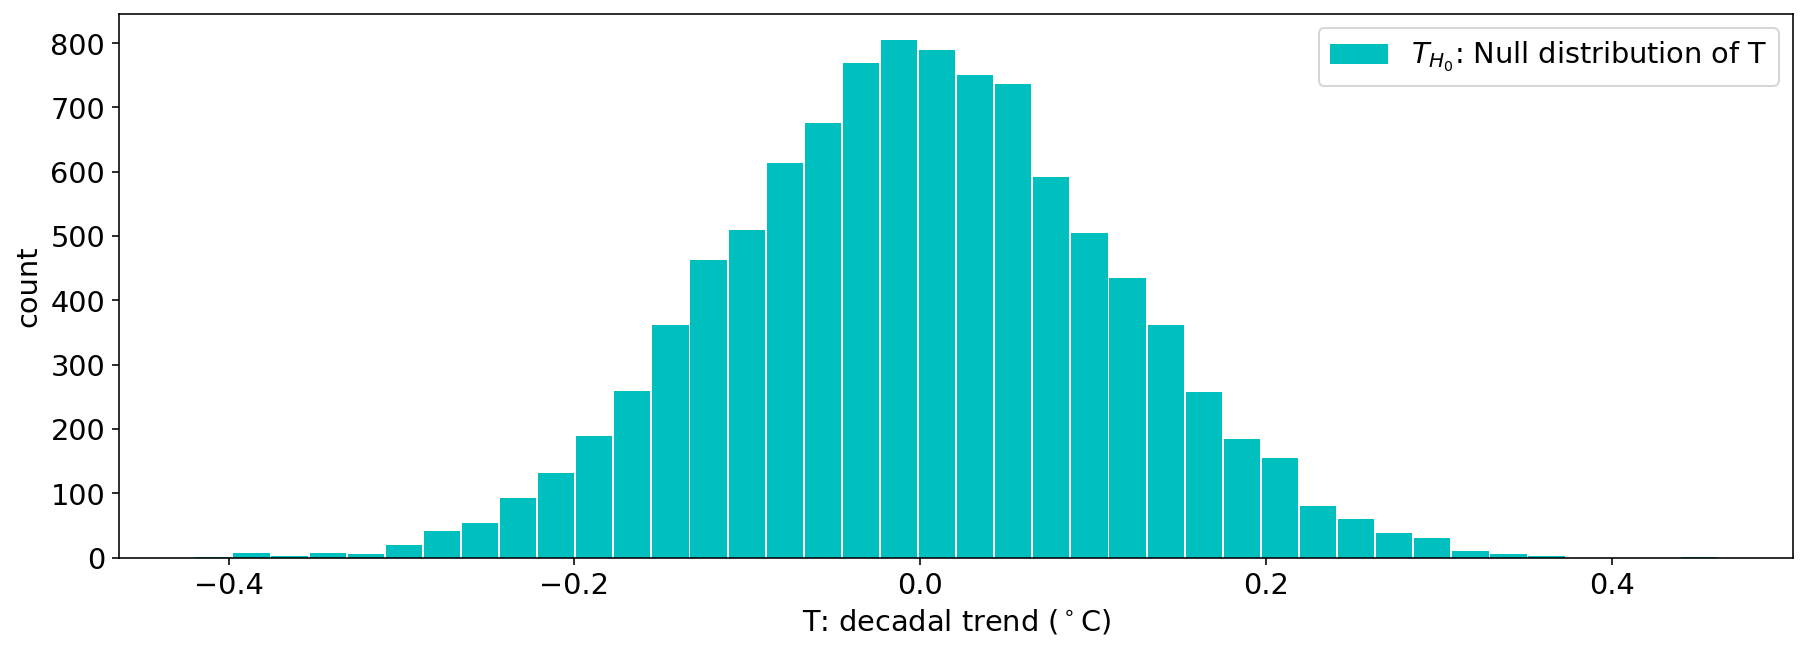

In [11]:
plt.hist(T_H0,40,rwidth=0.95,color='c',label='$T_{H_0}$: Null distribution of T');
plt.xlabel('T: decadal trend ($^\circ$C)')
plt.ylabel('count')
plt.legend()

# Observations 
Let's now assume that we have observed a warming trend of $0.1 ^\circ$C/decade. Is this warming trend statistically significant? 

## Critical value
We say that a warming trend is statistically significant we need to decide an acceptable "risk of being wrong". In Earth Sciences the threshold is usually chosen at $5%$. We are usually ok with a $5%$ chance the result was caused by noise, i.e. the null hypothesis. 

The critical value is defined as the 95th quantile of the null distribution. If the observatoins lie above the critical value, there is a $<5%$ chance they were caused by noise. 

Let's compute the critical value and plot it on the histogram, along with the observations:

In [12]:
T_obs=0.1;
c=np.quantile(T_H0,0.95);
print(c)

0.18199286715189197


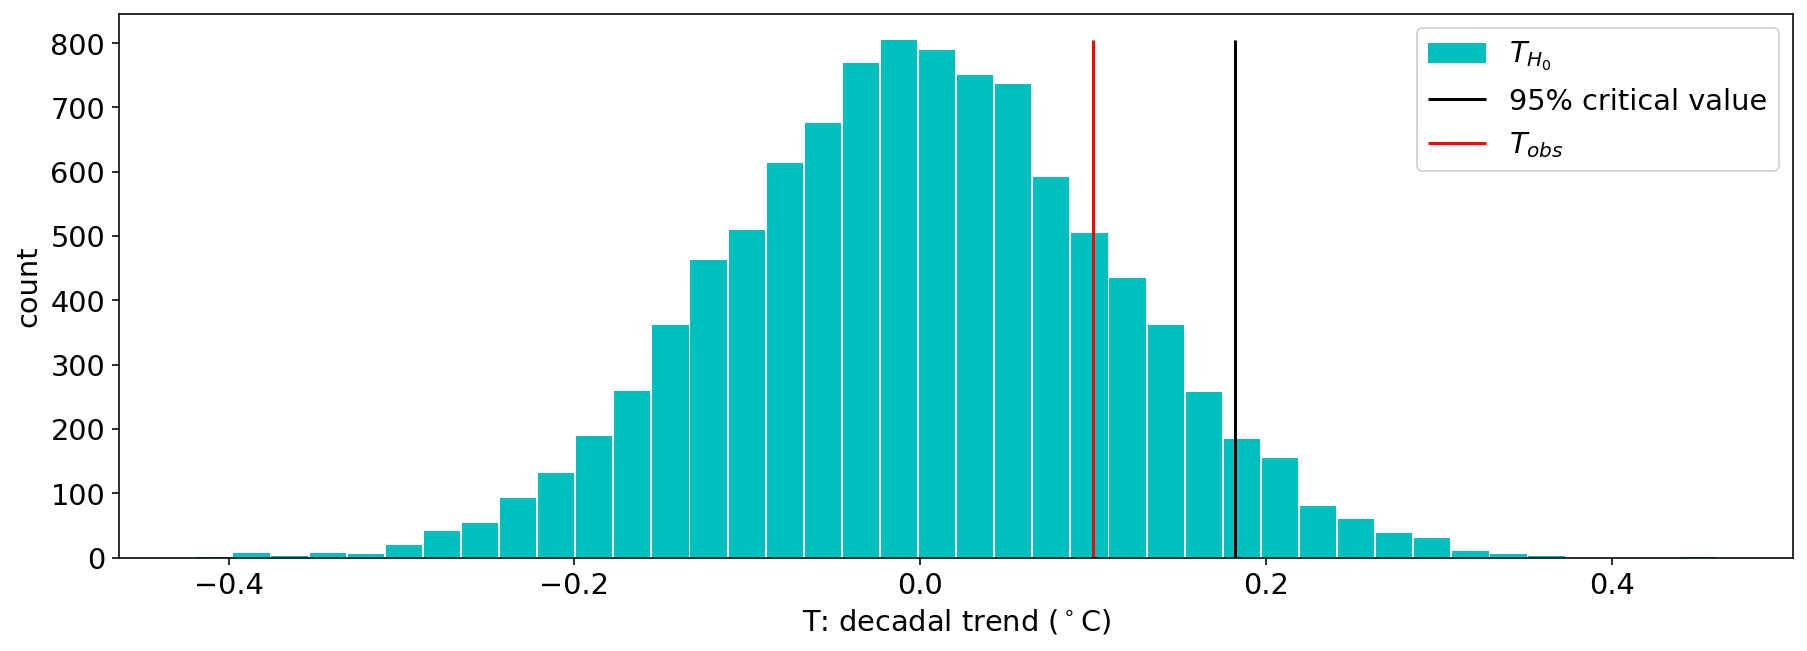

In [13]:
hist=plt.hist(T_H0,40,rwidth=0.95,label='$T_{H_0}$',color='c');
plt.xlabel('T: decadal trend ($^\circ$C)')
plt.ylabel('count')
plt.vlines(c,0,np.max(hist[0]),'k',label='95% critical value')
plt.vlines(T_obs,0,np.max(hist[0]),'r',label='$T_{obs}$')
plt.legend()

Notice that the observations lie below the critical value. That is, there is a more than $5%$ chance the null hypothesis of weather could generate a $0.1^\circ$C/decade trend. 

## p-value
The comparisson with the critical value gives a binary answer: can we reject the null hypothesis? We can also quantify the significance level using a p-value. The p-value is defined as one minus the quantile of the observations (the value of the CDF). 

*The p-value expresses what fraction much of the null distribution lies above the observed value*.

In [19]:
p_obs=1-stats.percentileofscore(T_H0,T_obs)/100
p_obs

0.18220000000000003

A p-value of $p_{obs}=0.18$ implies that $18%$ of the null hypothesis distribution $T_{H_0}$ lies above the observed value $T_{obs}$. In general , **the smaller the p-value the more statistically significant the observations**.

# Exercise:
Repeat the experiment but over a 20 years, using the same observed trend of $0.1^\circ$C/decade. Would a global warming trend that stays sustained over 20 years be statistically significant? 